In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
import scipy.stats
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from brian2.units import *

from mpl_toolkits.axes_grid1 import make_axes_locatable



In [2]:

import matplotlib as mlib
from scipy import stats

mlib.rcParams.update({'font.size': 25})
mlib.rcParams.update({'errorbar.capsize': 5})

# Sigma stim vs sigma form lat

In [3]:
# I forgot to save p_elim_dep for each run. Extract it from file name
data = np.load("C:/Work/phd/simulation_statistics/batch_analysis_164431_07022018.npz")
metadata = np.load("C:/Work/phd/simulation_statistics/batch_24e01d598539304ef87c72744f2f06b4.npz")
print data['recording_archive_name']
print 'Total time taken for simulations:', metadata['total_time']

../synaptogenesis/24e01d598539304ef87c72744f2f06b4/case1_sstim3.5_sformlat3.5_run1_randpart_@24e01d598539304ef87c72744f2f06b4.npz
Total time taken for simulations: 7:40:14.100024


In [4]:
snapshots = data['snapshots']
params = data['params']
dt = np.dtype([('rate', 'float'), 
               ('number_ff_synapses', 'float'), 
               ('final_weight_proportion', 'float'), 
               ('init_mean_std', 'float'),
               ('fin_mean_std_conn_shuf', 'float'),
               ('fin_mean_std_conn', 'float'),
               ('wsr_sigma_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_std_weight_shuf', 'float'),
               ('fin_mean_std_weight', 'float'),
               ('wsr_sigma_fin_weight_fin_weight_shuffle', 'float'),
               ('init_mean_AD', 'float'),
               ('fin_mean_AD_conn_shuf', 'float'),
               ('fin_mean_AD_conn', 'float'),
               ('wsr_AD_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_AD_weight_shuf', 'float'),
               ('fin_mean_AD_weight', 'float'),
               ('wsr_AD_fin_weight_fin_weight_shuffle', 'float'),
#                ('file_path', 'S59')
              ])
results = np.array(data['results'][:, :-1], dtype=dt)

In [5]:
parameters_of_interest = metadata['parameters_of_interest']

In [6]:
parameters_of_interest

array({'sigma_form_lats': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], 'no_runs': 1, 'cases': [1], 'lateral_inhibitions': 0, 'sigma_stims': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]}, dtype=object)

In [7]:
all_names = np.asarray(results.dtype.names)
interesting_names = all_names[np.where(['init' not in name and 'wsr' not in name for name in all_names])]
interesting_names_indices = np.where(['init' not in name and 'wsr' not in name for name in all_names])[0]
print interesting_names
print interesting_names.shape
print [interesting_names[0]]
print results[interesting_names[0]].shape
print results['rate'].shape
print results['rate'].size

['rate' 'number_ff_synapses' 'final_weight_proportion'
 'fin_mean_std_conn_shuf' 'fin_mean_std_conn' 'fin_mean_std_weight_shuf'
 'fin_mean_std_weight' 'fin_mean_AD_conn_shuf' 'fin_mean_AD_conn'
 'fin_mean_AD_weight_shuf' 'fin_mean_AD_weight']
(11L,)
['rate']
(49L, 17L)
(49L, 17L)
833


In [8]:
del parameters_of_interest.ravel()[0]['no_runs']

In [9]:
parameters_of_interest.ravel()[0]['sigma_form_laterals'] = parameters_of_interest.ravel()[0].pop('sigma_form_lats')

In [10]:
params_of_interest = parameters_of_interest.ravel()[0].keys()
set_of_poi = np.ones((results.shape[0], len(params_of_interest))) * np.nan
for index, param_set in np.ndenumerate(params[:,0]):
    for poi in range(len(params_of_interest)):
        set_of_poi[index[0], poi] = param_set[params_of_interest[poi][:-1]]

In [11]:
results_with_poi = np.concatenate((np.asarray(results[:, interesting_names_indices], dtype=float), set_of_poi), axis=1)

In [15]:
results_with_poi

array([[  7.80520833e-01,   5.50390625e+00,   1.76777566e-01,
          1.95493055e+00,   2.00547984e+00,   1.12314854e+00,
          1.06081577e+00,   1.44092802e+00,   1.53043779e+00,
          2.53867646e+00,   2.47777630e+00,   5.00000000e-01,
          0.00000000e+00,   5.00000000e-01,   1.00000000e+00],
       [  8.70182292e-01,   3.39843750e+00,   1.99631263e-01,
          1.56108364e+00,   1.52268730e+00,   7.76225860e-01,
          7.68928188e-01,   1.98493894e+00,   1.86172544e+00,
          2.21684402e+00,   2.26331575e+00,   1.00000000e+00,
          0.00000000e+00,   5.00000000e-01,   1.00000000e+00],
       [  6.05611979e-01,   2.34375000e-01,   4.58577474e-02,
          3.90625000e-02,   2.63671875e-02,   6.65456588e-03,
          6.65456588e-03,   6.92493897e-01,   6.27874046e-01,
          2.30262282e-01,   2.29340141e-01,   1.50000000e+00,
          0.00000000e+00,   5.00000000e-01,   1.00000000e+00],
       [  1.62145833e+00,   4.53125000e-01,   1.26363820e-01,
     

In [20]:
parameters_of_interest

array({'sigma_form_laterals': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], 'lateral_inhibitions': 0, 'sigma_stims': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], 'cases': [1]}, dtype=object)

In [21]:
sigma_stims = parameters_of_interest.ravel()[0]['sigma_stims']
sigma_form_laterals = parameters_of_interest.ravel()[0]['sigma_form_laterals']
hardcoded_t_record = 300 * second

print sigma_stims
print sigma_form_laterals
print params_of_interest

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
['sigma_form_laterals', 'lateral_inhibitions', 'sigma_stims', 'cases']


In [26]:
rates_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan
weight_prop = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan

std_weight_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan
ad_weight_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan

std_conn_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan
ad_conn_all_results = np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan

no_ff_conns= np.ones((len(sigma_stims), len(sigma_form_laterals))) * np.nan


CASE_1 = 1
for index, _ in np.ndenumerate(std_weight_all_results):
    sigma_index, sform_index = index
    logical_filter = np.logical_and(
                        results_with_poi[:,-4]==sigma_form_laterals[sform_index], 
                        results_with_poi[:, -2]==sigma_stims[sigma_index])
    
    std_weight_all_results[index] = results_with_poi[logical_filter].ravel()[6]
    ad_weight_all_results[index] = results_with_poi[logical_filter].ravel()[10]
    # use different set of results
    std_conn_all_results[index] =results_with_poi[logical_filter].ravel()[4]
    ad_conn_all_results[index] = results_with_poi[logical_filter].ravel()[8]
    
    rates_all_results[index] = results_with_poi[logical_filter].ravel()[0]
    weight_prop[index] = results_with_poi[logical_filter].ravel()[2]
    
    no_ff_conns[index] = results_with_poi[logical_filter].ravel()[1]
    



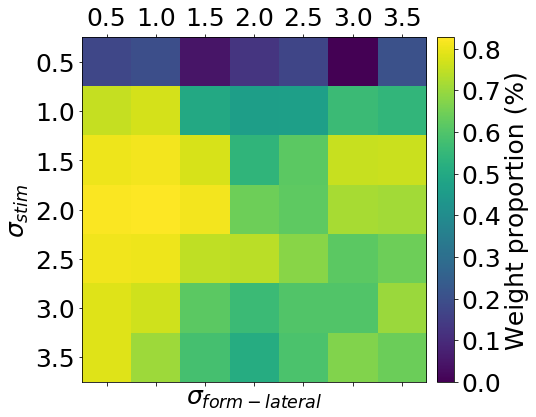

In [27]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(weight_prop)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Weight proportion (%)")
plt.tight_layout()
f.savefig('weight_proportion_sigma_stim_vs_sigma_form_lat_rand_partner.png')

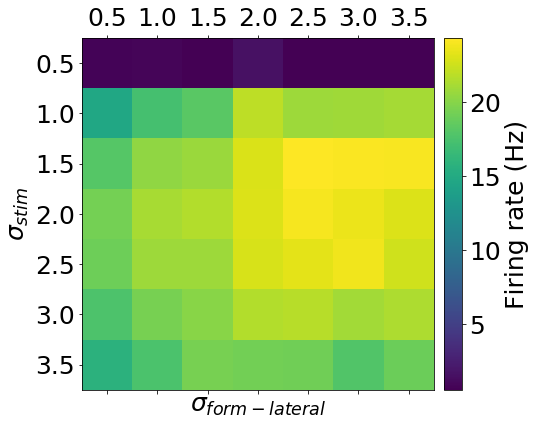

In [28]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(rates_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Firing rate (Hz)")
plt.tight_layout()
f.savefig('rates_sigma_stim_vs_sigma_form_lat_rand_partner.png')

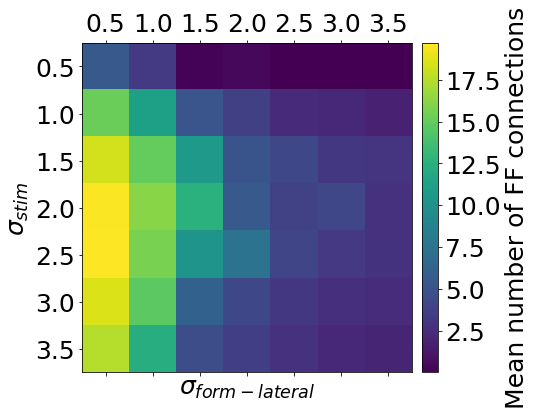

In [29]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(no_ff_conns)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean number of FF connections")
plt.tight_layout()
f.savefig('no_ff_conns_sigma_stim_vs_sigma_form_lat_rand_partner.png')

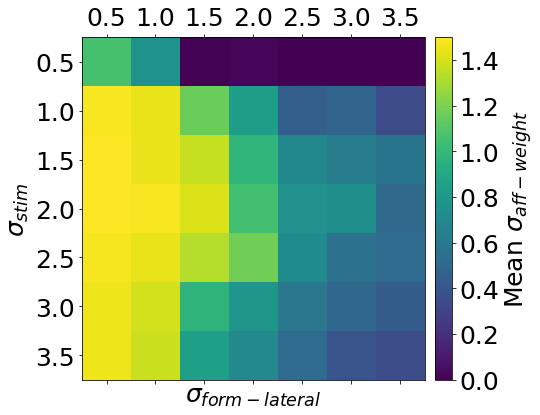

In [30]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(std_weight_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $\sigma_{aff-weight}$")
plt.tight_layout()
f.savefig('std_weight_sigma_stim_vs_sigma_form_lat_rand_partner.png')

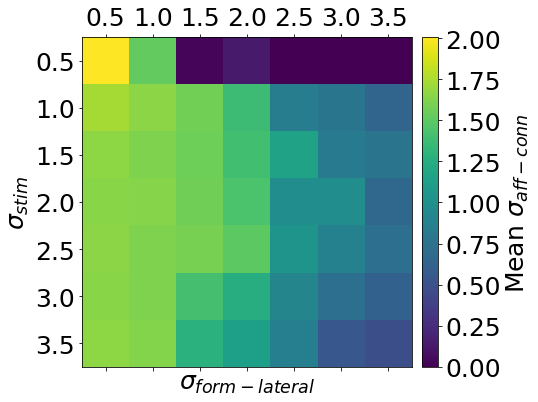

In [31]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(std_conn_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $\sigma_{aff-conn}$")
plt.tight_layout()
f.savefig('std_conn_sigma_stim_vs_sigma_form_lat_rand_partner.png')

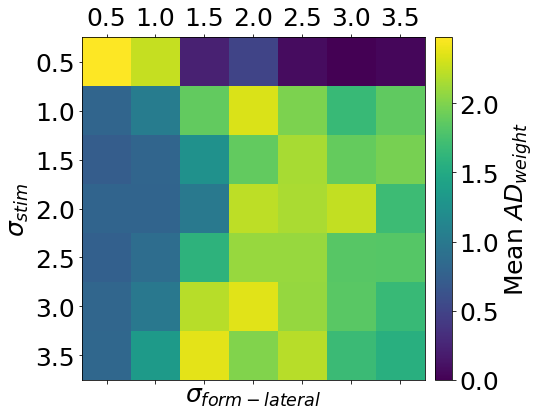

In [32]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(ad_weight_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $AD_{weight}$")
plt.tight_layout()
f.savefig('ad_weight_sigma_stim_vs_sigma_form_lat_rand_partner.png')

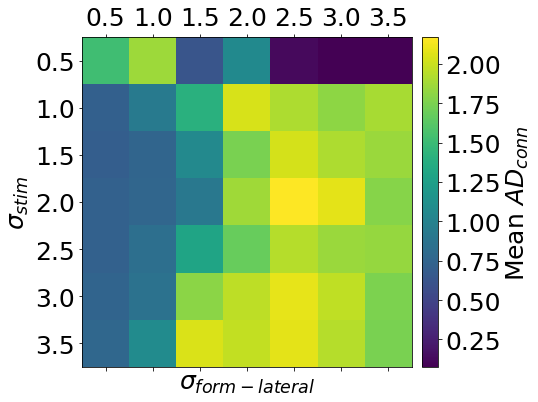

In [33]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(8,8), dpi=800)
i = ax1.matshow(ad_conn_all_results)
ax1.grid(visible=False)
# ax1.set_title("Correlation matrix", fontsize=16)
ax1.set_ylabel("$\sigma_{stim}$")
ax1.set_xlabel("$\sigma_{form-lateral}$")
ax1.set_xticks(range(len(sigma_stims)))
ax1.set_xticklabels(sigma_stims, ha='center')
ax1.set_yticks(range(len(sigma_form_laterals)))
ax1.set_yticklabels(sigma_form_laterals, ha='right')
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(i, cax=cax)
cbar.set_label("Mean $AD_{conn}$")
plt.tight_layout()
f.savefig('ad_conn_sigma_stim_vs_sigma_form_lat_rand_partner.png')

# These details in numbers

In [34]:
from pprint import pprint as pp
print "rates_all_results \n", pp(rates_all_results)
print "weight_prop \n", pp(weight_prop )

print "std_weight_all_results \n", pp(std_weight_all_results) 
print "ad_weight_all_results \n", pp(ad_weight_all_results) 

print "std_conn_all_results \n", pp(std_conn_all_results) 
print "ad_conn_all_results \n", pp(ad_conn_all_results)

print "no_ff_conns \n", pp(no_ff_conns)


rates_all_results 
array([[  0.78052083,   0.87018229,   0.60561198,   1.62145833,
          0.55591146,   0.57023437,   0.59259115],
       [ 14.67572917,  17.2930599 ,  18.27356771,  21.96373698,
         20.82971354,  20.88721354,  21.11016927],
       [ 18.05605469,  20.38191406,  20.77700521,  23.00089844,
         24.31217448,  24.14923177,  24.11152344],
       [ 19.37945313,  21.16731771,  21.5680599 ,  23.0475651 ,
         24.00652344,  23.65747396,  23.03178385],
       [ 19.11395833,  20.78985677,  20.7993099 ,  22.86684896,
         23.38173177,  23.81808594,  22.59277344],
       [ 17.71723958,  19.45986979,  20.07286458,  21.53263021,
         21.73617188,  21.02360677,  21.39489583],
       [ 15.85125   ,  17.55830729,  19.39985677,  19.25145833,
         19.2025    ,  17.89433594,  19.00986979]])
None
weight_prop 
array([[ 0.17677757,  0.19963126,  0.04585775,  0.12636382,  0.17333984,
         0.        ,  0.20507812],
       [ 0.75478959,  0.77226498,  0.49797339,  0

In [35]:
np.unravel_index(std_weight_all_results.argmin(), std_weight_all_results.shape)

(0, 4)

In [36]:
np.unravel_index(ad_weight_all_results.argmin(), ad_weight_all_results.shape)

(0, 5)

In [37]:
np.unravel_index(std_weight_all_results.argmax(), std_weight_all_results.shape)

(3, 0)

In [38]:
np.unravel_index(ad_weight_all_results.argmax(), ad_weight_all_results.shape)

(0, 0)